In [3]:
# python includes
import torch

In [12]:
# optimal ultrasound includes
import src.ultrasound_encoding as ue
import src.ultrasound_beamforming as ub
import src.ultrasound_utilities as uu
import src.weight_constraints as wc

from src.encoding_optimization import optimal_image_encoding

In [5]:
test_folder = "results/"
training_set = "data/training_data"
testing_set = "data/testing_data"

In [6]:
# Get encoding sequence
num_beams = 31
init_delays = ue.calc_delays_planewaves(num_beams, span=60)
init_weights = ue.calc_uniform_weights(num_beams)

In [7]:
# Get optimization parameters
opt_params = "delays"
loss_func = "L2" # or "gCNR"
WeightProj = wc.L1BallProjection()
target_type = "unencoded"

In [8]:
# Get training parameters
training_resolution = "half"
num_epochs = 5
desc_alg = "SGD"
lrate = 0.1
training_shuffle = True

In [9]:
# image parameters
image_dims = [300, 500]
dB_min = -60

In [10]:
# Encoding paramers
noise_param = [0.7, 12]
tik_param = 0.1

results/example_results
Getting testing data................
-------------Training Phase-------------
step 0 loss: 4244.998046875
step 1 loss: 5036.744140625
step 2 loss: 4917.64892578125
step 3 loss: 3460.97314453125
step 4 loss: 4248.59814453125
step 5 loss: 5749.99560546875
step 6 loss: 4981.02587890625
step 7 loss: 7221.1591796875
epoch: 0, average loss: 4982.642883300781
step 0 loss: 4195.99267578125
step 1 loss: 4250.60791015625
step 2 loss: 5721.8369140625
step 3 loss: 5709.8154296875
step 4 loss: 4225.75830078125
step 5 loss: 5685.09423828125
step 6 loss: 4199.09423828125
step 7 loss: 5689.73046875
epoch: 1, average loss: 4959.741271972656
step 0 loss: 6442.775390625
step 1 loss: 4179.0146484375
step 2 loss: 4197.48779296875
step 3 loss: 5738.1982421875
step 4 loss: 4210.84033203125
step 5 loss: 4893.39990234375
step 6 loss: 4163.8017578125
step 7 loss: 5626.3095703125
epoch: 2, average loss: 4931.478454589844
step 0 loss: 4886.0498046875
step 1 loss: 4916.95703125
step 2 loss:

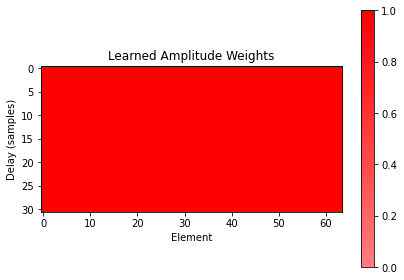

In [13]:
optimal_image_encoding(test_folder, training_set, testing_set, # Folder names containing data and results
                       init_delays, init_weights,  # optimization initial parameters
                       opt_params = opt_params, loss_func=loss_func, WeightProj=WeightProj, training_resolution=training_resolution,  target_type=target_type, # optimization parameters
                       num_epochs=num_epochs, desc_alg=desc_alg, lrate=lrate, training_shuffle = training_shuffle, # descent algorithm hyperparameters
                       image_dims=image_dims, dB_min=dB_min,   # image parameters
                       noise_param=noise_param, tik_param=tik_param, # Encoding parameters
                       notes="Example test to see if the JupyterLab file works. ")